# Import necessary dependencies and settings

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200
%matplotlib inline

# Sample corpus of text documents

In [2]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


In [2]:
corpus = ['Ο ουρανός είναι γαλάζιος και όμορφος.',
          'Αγάπησε αυτόν τον γαλάζιο και όμορφο ουρανό!',
          'Η γρήγορη καφέ αλεπού πηδάει πάνω από το τεμπέλικο σκυλί.',
          "Ένα βασιλικό πρωινό γεύμα έχει λουκάνικα, μπέικον, αυγά, τοστ και φασόλια",
          'Λατρεύω τα πράσινα αυγά, λουκάνικα, μπέικον και φασόλια!',
          'Η καφέ αλεπού είναι γρήγορη και το μπλε σκυλί είναι τεμπέλικο!',
          'Ο ουρανός είναι πολύ γαλάζιος και ο ουρανός είναι πολύ όμορφος σήμερα',
          'Το σκυλί είναι τεμπέλικο αλλά η καφέ αλεπού είναι γρήγορη!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,Ο ουρανός είναι γαλάζιος και όμορφος.,weather
1,Αγάπησε αυτόν τον γαλάζιο και όμορφο ουρανό!,weather
2,Η γρήγορη καφέ αλεπού πηδάει πάνω από το τεμπέλικο σκυλί.,animals
3,"Ένα βασιλικό πρωινό γεύμα έχει λουκάνικα, μπέικον, αυγά, τοστ και φασόλια",food
4,"Λατρεύω τα πράσινα αυγά, λουκάνικα, μπέικον και φασόλια!",food
5,Η καφέ αλεπού είναι γρήγορη και το μπλε σκυλί είναι τεμπέλικο!,animals
6,Ο ουρανός είναι πολύ γαλάζιος και ο ουρανός είναι πολύ όμορφος σήμερα,weather
7,Το σκυλί είναι τεμπέλικο αλλά η καφέ αλεπού είναι γρήγορη!,animals


# Simple text pre-processing

In [13]:
wpt = nltk.WordPunctTokenizer()
# stop_words = nltk.corpus.stopwords.words('greek')
stop_words = """
ένα
έναν
ένας
αι
ακομα
ακομη
ακριβως
αληθεια
αληθινα
αλλα
αλλαχου
αλλες
αλλη
αλλην
αλλης
αλλιως
αλλιωτικα
αλλο
αλλοι
αλλοιως
αλλοιωτικα
αλλον
αλλος
αλλοτε
αλλου
αλλους
αλλων
αμα
αμεσα
αμεσως
αν
ανα
αναμεσα
αναμεταξυ
ανευ
αντι
αντιπερα
αντις
ανω
ανωτερω
αξαφνα
απ
απεναντι
απο
αποψε
από
αρα
αραγε
αργα
αργοτερο
αριστερα
αρκετα
αρχικα
ας
αυριο
αυτα
αυτες
αυτεσ
αυτη
αυτην
αυτης
αυτο
αυτοι
αυτον
αυτος
αυτοσ
αυτου
αυτους
αυτουσ
αυτων
αφοτου
αφου
αἱ
αἳ
αἵ
αὐτόσ
αὐτὸς
αὖ
α∆ιακοπα
βεβαια
βεβαιοτατα
γάρ
γα
γα^
γε
γι
για
γοῦν
γρηγορα
γυρω
γὰρ
δ'
δέ
δή
δαί
δαίσ
δαὶ
δαὶς
δε
δεν
δι
δι'
διά
δια
διὰ
δὲ
δὴ
δ’
εαν
εαυτο
εαυτον
εαυτου
εαυτους
εαυτων
εγκαιρα
εγκαιρως
εγω
ειθε
ειμαι
ειμαστε
ειναι
εις
εισαι
εισαστε
ειστε
ειτε
ειχα
ειχαμε
ειχαν
ειχατε
ειχε
ειχες
ει∆εμη
εκ
εκαστα
εκαστες
εκαστη
εκαστην
εκαστης
εκαστο
εκαστοι
εκαστον
εκαστος
εκαστου
εκαστους
εκαστων
εκει
εκεινα
εκεινες
εκεινεσ
εκεινη
εκεινην
εκεινης
εκεινο
εκεινοι
εκεινον
εκεινος
εκεινοσ
εκεινου
εκεινους
εκεινουσ
εκεινων
εκτος
εμας
εμεις
εμενα
εμπρος
εν
ενα
εναν
ενας
ενος
εντελως
εντος
εντωμεταξυ
ενω
ενός
εξ
εξαφνα
εξης
εξισου
εξω
επ
επί
επανω
επειτα
επει∆η
επι
επισης
επομενως
εσας
εσεις
εσενα
εστω
εσυ
ετερα
ετεραι
ετερας
ετερες
ετερη
ετερης
ετερο
ετεροι
ετερον
ετερος
ετερου
ετερους
ετερων
ετουτα
ετουτες
ετουτη
ετουτην
ετουτης
ετουτο
ετουτοι
ετουτον
ετουτος
ετουτου
ετουτους
ετουτων
ετσι
ευγε
ευθυς
ευτυχως
εφεξης
εχει
εχεις
εχετε
εχθες
εχομε
εχουμε
εχουν
εχτες
εχω
εως
εἰ
εἰμί
εἰμὶ
εἰς
εἰσ
εἴ
εἴμι
εἴτε
ε∆ω
η
ημασταν
ημαστε
ημουν
ησασταν
ησαστε
ησουν
ηταν
ητανε
ητοι
ηττον
η∆η
θα
ι
ιι
ιιι
ισαμε
ισια
ισως
ισωσ
ι∆ια
ι∆ιαν
ι∆ιας
ι∆ιες
ι∆ιο
ι∆ιοι
ι∆ιον
ι∆ιος
ι∆ιου
ι∆ιους
ι∆ιων
ι∆ιως
κ
καί
καίτοι
καθ
καθε
καθεμια
καθεμιας
καθενα
καθενας
καθενος
καθετι
καθολου
καθως
και
κακα
κακως
καλα
καλως
καμια
καμιαν
καμιας
καμποσα
καμποσες
καμποση
καμποσην
καμποσης
καμποσο
καμποσοι
καμποσον
καμποσος
καμποσου
καμποσους
καμποσων
κανεις
κανεν
κανενα
κανεναν
κανενας
κανενος
καποια
καποιαν
καποιας
καποιες
καποιο
καποιοι
καποιον
καποιος
καποιου
καποιους
καποιων
καποτε
καπου
καπως
κατ
κατά
κατα
κατι
κατιτι
κατοπιν
κατω
κατὰ
καὶ
κι
κιολας
κλπ
κοντα
κτλ
κυριως
κἀν
κἂν
λιγακι
λιγο
λιγωτερο
λογω
λοιπα
λοιπον
μέν
μέσα
μή
μήτε
μία
μα
μαζι
μακαρι
μακρυα
μαλιστα
μαλλον
μας
με
μεθ
μεθαυριο
μειον
μελει
μελλεται
μεμιας
μεν
μερικα
μερικες
μερικοι
μερικους
μερικων
μεσα
μετ
μετά
μετα
μεταξυ
μετὰ
μεχρι
μη
μην
μηπως
μητε
μη∆ε
μιά
μια
μιαν
μιας
μολις
μολονοτι
μοναχα
μονες
μονη
μονην
μονης
μονο
μονοι
μονομιας
μονος
μονου
μονους
μονων
μου
μπορει
μπορουν
μπραβο
μπρος
μἐν
μὲν
μὴ
μὴν
να
ναι
νωρις
ξανα
ξαφνικα
ο
οι
ολα
ολες
ολη
ολην
ολης
ολο
ολογυρα
ολοι
ολον
ολονεν
ολος
ολοτελα
ολου
ολους
ολων
ολως
ολως∆ιολου
ομως
ομωσ
οποια
οποιαν
οποιαν∆ηποτε
οποιας
οποιας∆ηποτε
οποια∆ηποτε
οποιες
οποιες∆ηποτε
οποιο
οποιοι
οποιον
οποιον∆ηποτε
οποιος
οποιος∆ηποτε
οποιου
οποιους
οποιους∆ηποτε
οποιου∆ηποτε
οποιο∆ηποτε
οποιων
οποιων∆ηποτε
οποι∆ηποτε
οποτε
οποτε∆ηποτε
οπου
οπου∆ηποτε
οπως
οπωσ
ορισμενα
ορισμενες
ορισμενων
ορισμενως
οσα
οσα∆ηποτε
οσες
οσες∆ηποτε
οση
οσην
οσην∆ηποτε
οσης
οσης∆ηποτε
οση∆ηποτε
οσο
οσοι
οσοι∆ηποτε
οσον
οσον∆ηποτε
οσος
οσος∆ηποτε
οσου
οσους
οσους∆ηποτε
οσου∆ηποτε
οσο∆ηποτε
οσων
οσων∆ηποτε
οταν
οτι
οτι∆ηποτε
οτου
ου
ουτε
ου∆ε
οχι
οἱ
οἳ
οἷς
οὐ
οὐδ
οὐδέ
οὐδείσ
οὐδεὶς
οὐδὲ
οὐδὲν
οὐκ
οὐχ
οὐχὶ
οὓς
οὔτε
οὕτω
οὕτως
οὕτωσ
οὖν
οὗ
οὗτος
οὗτοσ
παλι
παντοτε
παντου
παντως
παρ
παρά
παρα
παρὰ
περί
περα
περι
περιπου
περισσοτερο
περσι
περυσι
περὶ
πια
πιθανον
πιο
πισω
πλαι
πλεον
πλην
ποια
ποιαν
ποιας
ποιες
ποιεσ
ποιο
ποιοι
ποιον
ποιος
ποιοσ
ποιου
ποιους
ποιουσ
ποιων
πολυ
ποσες
ποση
ποσην
ποσης
ποσοι
ποσος
ποσους
ποτε
που
πουθε
πουθενα
ποῦ
πρεπει
πριν
προ
προκειμενου
προκειται
προπερσι
προς
προσ
προτου
προχθες
προχτες
πρωτυτερα
πρόσ
πρὸ
πρὸς
πως
πωσ
σαν
σας
σε
σεις
σημερα
σιγα
σου
στα
στη
στην
στης
στις
στο
στον
στου
στους
στων
συγχρονως
συν
συναμα
συνεπως
συνηθως
συχνα
συχνας
συχνες
συχνη
συχνην
συχνης
συχνο
συχνοι
συχνον
συχνος
συχνου
συχνους
συχνων
συχνως
σχε∆ον
σωστα
σόσ
σύ
σύν
σὸς
σὺ
σὺν
τά
τήν
τί
τίς
τίσ
τα
ταυτα
ταυτες
ταυτη
ταυτην
ταυτης
ταυτο,ταυτον
ταυτος
ταυτου
ταυτων
ταχα
ταχατε
ταῖς
τα∆ε
τε
τελικα
τελικως
τες
τετοια
τετοιαν
τετοιας
τετοιες
τετοιο
τετοιοι
τετοιον
τετοιος
τετοιου
τετοιους
τετοιων
τη
την
της
τησ
τι
τινα
τιποτα
τιποτε
τις
τισ
το
τοί
τοι
τοιοῦτος
τοιοῦτοσ
τον
τος
τοσα
τοσες
τοση
τοσην
τοσης
τοσο
τοσοι
τοσον
τοσος
τοσου
τοσους
τοσων
τοτε
του
τουλαχιστο
τουλαχιστον
τους
τουτα
τουτες
τουτη
τουτην
τουτης
τουτο
τουτοι
τουτοις
τουτον
τουτος
τουτου
τουτους
τουτων
τούσ
τοὺς
τοῖς
τοῦ
τυχον
των
τωρα
τό
τόν
τότε
τὰ
τὰς
τὴν
τὸ
τὸν
τῆς
τῆσ
τῇ
τῶν
τῷ
υπ
υπερ
υπο
υποψη
υποψιν
υπό
υστερα
φετος
χαμηλα
χθες
χτες
χωρις
χωριστα
ψηλα
ω
ωραια
ως
ωσ
ωσαν
ωσοτου
ωσπου
ωστε
ωστοσο
ωχ
ἀλλ'
ἀλλά
ἀλλὰ
ἀλλ’
ἀπ
ἀπό
ἀπὸ
ἀφ
ἂν
ἃ
ἄλλος
ἄλλοσ
ἄν
ἄρα
ἅμα
ἐάν
ἐγώ
ἐγὼ
ἐκ
ἐμόσ
ἐμὸς
ἐν
ἐξ
ἐπί
ἐπεὶ
ἐπὶ
ἐστι
ἐφ
ἐὰν
ἑαυτοῦ
ἔτι
ἡ
ἢ
ἣ
ἤ
ἥ
ἧς
ἵνα
ὁ
ὃ
ὃν
ὃς
ὅ
ὅδε
ὅθεν
ὅπερ
ὅς
ὅσ
ὅστις
ὅστισ
ὅτε
ὅτι
ὑμόσ
ὑπ
ὑπέρ
ὑπό
ὑπὲρ
ὑπὸ
ὡς
ὡσ
ὥς
ὥστε
ὦ
ᾧ
∆α
∆ε
∆εινα
∆εν
∆εξια
∆ηθεν
∆ηλα∆η
∆ι
∆ια
∆ιαρκως
∆ικα
∆ικο
∆ικοι
∆ικος
∆ικου
∆ικους
∆ιολου
∆ιπλα
∆ιχως
"""

# def normalize_document(doc):
#     # lower case and remove special characters\whitespaces
#     doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
#     doc = doc.lower()
#     doc = doc.strip()
#     # tokenize document
#     tokens = wpt.tokenize(doc)
#     # filter stopwords out of document
#     filtered_tokens = [token for token in tokens if token not in stop_words]
#     # re-create document from filtered tokens
#     doc = ' '.join(filtered_tokens)
#     return doc

# normalize_corpus = np.vectorize(normalize_document)

import spacy
import unicodedata
from nltk.corpus import wordnet
# import el_core_news_md
# nlp = el_core_news_md.load()

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Zα-ωΑ-Ωάέίόώήύ\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    
    nfkd_form = unicodedata.normalize('NFKD', doc)
    doc = u"".join([c for c in nfkd_form if not unicodedata.combining(c)])
    
    doc = doc.strip()
    
    doc = nlp(doc)
    doc = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in doc])
    
    # tokenize document
    # tokens = tokenizer.tokenize(doc)
    tokens = wpt.tokenize(doc)
          
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [14]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['ουρανο γαλαζιος ομορφος', 'αγαπησε γαλαζιο ομορφος ουρανο',
       'γρηγορη καφε αλεπο πηδαω τεμπελικο σκυλι',
       'βασιλικος πρωινο γευμο λουκανικος μπεικον αυγας τοστ φασολιο',
       'λατρευω πρασινος αυγας λουκανικα μπεικον φασολιο',
       'καφε αλεπο γρηγορη μπλε σκυλι τεμπελικο',
       'ουρανο γαλαζιο ουρανο ομορφος',
       'σκυλι τεμπελικο καφε αλεπο γρηγορη'], dtype='<U60')

# Word Embeddings
There are two main types of methods for contextual word vectors.
Count-based methods like Latent Semantic Analysis (LSA) can be used to calculate statistical measures of how often words occur with their neighboring words in a corpus and then build dense word vectors for each word from these measures. 
Predictive methods like neural network based language models try to predict words from their neighboring words by looking at word sequences in the corpus. In the process, it learns distributed representations giving us dense word embeddings.

## Load up sample corpus - Bible

In [5]:
from nltk.corpus import gutenberg
from string import punctuation

bible = gutenberg.sents('bible-kjv.txt') 
remove_terms = punctuation + '0123456789'

norm_bible = [[word.lower() for word in sent if word not in remove_terms] for sent in bible]
norm_bible = [' '.join(tok_sent) for tok_sent in norm_bible]
norm_bible = filter(None, normalize_corpus(norm_bible))
norm_bible = [tok_sent for tok_sent in norm_bible if len(tok_sent.split()) > 2]

print('Total lines:', len(bible))
print('\nSample line:', bible[10])
print('\nProcessed line:', norm_bible[10])

Total lines: 30103

Sample line: ['1', ':', '6', 'And', 'God', 'said', ',', 'Let', 'there', 'be', 'a', 'firmament', 'in', 'the', 'midst', 'of', 'the', 'waters', ',', 'and', 'let', 'it', 'divide', 'the', 'waters', 'from', 'the', 'waters', '.']

Processed line: god said let firmament midst waters let divide waters waters


Let’s now look at some of the popular word embedding models (Word2Vec-unsuoervised, GloVe, FastText) and engineer
meaningful features from our corpora.
## Implementing a word2vec model using a CBOW (Continuous Bag of Words) neural network architecture
The implementation will focus on four parts:
• Build the corpus vocabulary
• Build a CBOW (context, target) generator
• Build the CBOW model architecture
• Train the model
• Get word embeddings

### Build Vocabulary

In [7]:
# To start off, we will build our corpus vocabulary, where we extract each unique word
# from our vocabulary and map a unique numeric identifier to it.
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_bible)
word2id = tokenizer.word_index

word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_bible]

vocab_size = len(word2id)
embed_size = 100
window_size = 2

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])
# Thus, you can see that we created a vocabulary of unique words in our corpus and
# ways to map a word to its unique identifier and vice versa.

Using TensorFlow backend.
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

Vocabulary Size: 12425
Vocabulary Sample: [('shall', 1), ('unto', 2), ('lord', 3), ('thou', 4), ('thy', 5), ('god', 6), ('ye', 7), ('said', 8), ('thee', 9), ('upon', 10)]


### Build (context_words, target_word) pair generator
We need pairs that consist of a target center word and surround the context words. In our implementation, a target word is of length 1 and the surrounding context is of length 2 × window _ size, where we take window_size words before and after the target word in our corpus.

In [8]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)

In [9]:
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1
# The preceding output should give you some more perspective of how X forms
# our context words and we are trying to predict the target center word Y, based on this
# context. For example, say the original text was “in the beginning god created heaven and
# earth” which, after preprocessing and removal of stopwords, became “beginning god
# created heaven earth”. Given [beginning, god, heaven, earth] as the context, the target
# center word is “created” in this case.

Context (X): ['old', 'testament', 'james', 'bible'] -> Target (Y): king
Context (X): ['first', 'book', 'called', 'genesis'] -> Target (Y): moses
Context (X): ['beginning', 'god', 'heaven', 'earth'] -> Target (Y): created
Context (X): ['earth', 'without', 'void', 'darkness'] -> Target (Y): form
Context (X): ['without', 'form', 'darkness', 'upon'] -> Target (Y): void
Context (X): ['form', 'void', 'upon', 'face'] -> Target (Y): darkness
Context (X): ['void', 'darkness', 'face', 'deep'] -> Target (Y): upon
Context (X): ['spirit', 'god', 'upon', 'face'] -> Target (Y): moved
Context (X): ['god', 'moved', 'face', 'waters'] -> Target (Y): upon
Context (X): ['god', 'said', 'light', 'light'] -> Target (Y): let
Context (X): ['god', 'saw', 'good', 'god'] -> Target (Y): light


### Build CBOW Deep Network Model
We now leverage Keras on top of TensorFlow to build our deep learning architecture for the CBOW model. For this, our inputs will be our context words, which are passed to an embedding layer (initialized with random weights).

The word embeddings are propagated to a lambda layer where we average the word embeddings (hence called CBOW because we don’t really consider the order or sequence in the context words when averaged). Then, we pass this averaged context embedding to a dense softmax layer, which predicts our target word. We match this with the actual target word, compute the loss by leveraging the categorical_crossentropy loss, and perform back-propagation with each epoch to update the embedding layer in the process. The following code shows the model architecture.

In [10]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))

cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')
print(cbow.summary())

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 100)            1242500   
_________________________________________________________________
lambda_1 (Lambda)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 12425)             1254925   
Total params: 2,497,425
Trainable params: 2,497,425
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
! pip install pydot

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

### Train model for 5 epochs
Running the model on our complete corpus takes a fair bit of time.
Running this model is computationally expensive and works better if
trained using a GPU. The training on an AWS p2.x instance with a Tesla K80 GPU  take close to 1.5 hours for just five epochs!
Training for more epochs usually ends up giving better results.

In [86]:
for epoch in range(1, 6):
    loss = 0.
    i = 0
    for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 100000 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)
    print()

Processed 100000 (context, word) pairs
Processed 200000 (context, word) pairs
Processed 300000 (context, word) pairs
Epoch: 1 	Loss: 4257900.60084

Processed 100000 (context, word) pairs
Processed 200000 (context, word) pairs
Processed 300000 (context, word) pairs
Epoch: 2 	Loss: 4256209.59646

Processed 100000 (context, word) pairs
Processed 200000 (context, word) pairs
Processed 300000 (context, word) pairs
Epoch: 3 	Loss: 4247990.90456

Processed 100000 (context, word) pairs
Processed 200000 (context, word) pairs
Processed 300000 (context, word) pairs
Epoch: 4 	Loss: 4225663.18927

Processed 100000 (context, word) pairs
Processed 200000 (context, word) pairs
Processed 300000 (context, word) pairs
Epoch: 5 	Loss: 4104501.48929



### Get word embeddings

In [94]:
weights = cbow.get_weights()[0]
weights = weights[1:]
print(weights.shape)

pd.DataFrame(weights, index=list(id2word.values())[1:]).head()

(12424, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
shall,-1.183386,-2.866214,1.046431,0.943265,-1.021784,-0.047069,2.108584,-0.458692,-1.698881,0.905800,...,0.655786,0.703828,0.821803,-0.093732,-2.474536,2.309505,0.713962,-0.175176,0.262700,0.818652
unto,-1.725262,-1.765972,1.411971,0.917713,0.793832,0.310631,1.541964,-0.082523,-1.346811,0.095824,...,1.682762,-0.872293,1.908597,0.977152,-0.835005,1.128618,0.834068,1.852117,-2.522386,-0.053387
lord,1.694633,-0.650949,-0.095796,0.950002,0.813837,1.538206,1.125482,-1.655581,-1.352673,0.409504,...,1.553925,-0.819261,1.086127,-1.545129,-0.035251,1.895598,2.378903,-1.632835,1.375105,0.599096
thou,-1.590623,-0.801968,1.659041,1.314925,-0.455822,1.733872,-0.233771,-0.638922,0.104744,0.490223,...,0.652781,-0.362778,-0.190355,0.040719,-1.988184,2.330042,1.441790,-1.771272,-1.738142,-3.210077
thy,0.386488,-0.834605,0.585985,0.801969,-0.165132,0.999917,1.224088,-0.317555,-0.671106,-1.073181,...,1.267184,-0.564660,0.089618,-0.979835,-0.215604,2.189568,0.529003,-1.682130,-0.632460,0.578122


### Build a distance matrix to view the most similar words (contextually)

In [95]:
from sklearn.metrics.pairwise import euclidean_distances

# compute pairwise distance matrix
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

# view contextually similar words
similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['god', 'jesus', 'noah', 'egypt', 'john', 'gospel', 'moses','famine']}

similar_words

(12424, 12424)


{'egypt': ['destroy', 'none', 'whole', 'jacob', 'sea'],
 'famine': ['wickedness', 'sore', 'countries', 'cease', 'portion'],
 'god': ['therefore', 'heard', 'may', 'behold', 'heaven'],
 'gospel': ['church', 'fowls', 'churches', 'preached', 'doctrine'],
 'jesus': ['law', 'heard', 'world', 'many', 'dead'],
 'john': ['dream', 'bones', 'held', 'present', 'alive'],
 'moses': ['pharaoh', 'gate', 'jews', 'departed', 'lifted'],
 'noah': ['abram', 'plagues', 'hananiah', 'korah', 'sarah']}

## Implementing a word2vec model using a skip-gram neural network architecture (from scratch)
Skip-Gram architecture often gives better results than CBOW.

The Skip-Gram model architecture tries to achieve the reverse of what the CBOW model does. It tries to predict the source context words (surrounding words) given a target word (the center word).

### Build Vocabulary

In [16]:
from keras.preprocessing import text

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_bible)

word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}

vocab_size = len(word2id) + 1 
embed_size = 100

wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_bible]
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])
# Each unique word from the corpus is now part of our vocabulary and has a unique
# numeric identifier

Vocabulary Size: 12425
Vocabulary Sample: [('shall', 1), ('unto', 2), ('lord', 3), ('thou', 4), ('thy', 5), ('god', 6), ('ye', 7), ('said', 8), ('thee', 9), ('upon', 10)]


### Build and View sample skip grams ((word1, word2) -> relevancy)

In [22]:
# Keras has a nifty Skip-Grams utility that can
# be used and we don’t have to manually implement this generator like we did in CBOW.
from keras.preprocessing.sequence import skipgrams

# generate skip-grams
skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=10) for wid in wids]

# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id2word[pairs[i][0]], pairs[i][0], 
          id2word[pairs[i][1]], pairs[i][1], 
          labels[i]))
# see what # is relevant and what is irrelevant based on the label (0 or 1).

KeyboardInterrupt: 

### Build Skip-gram Deep Network Model

In [ ]:
# leverage Keras on top of TensorFlow to build our deep learning architecture
from keras.layers import Dot
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.models import Model

word_model = Sequential()
word_model.add(Embedding(vocab_size, embed_size,
                         embeddings_initializer="glorot_uniform",
                         input_length=1))
word_model.add(Reshape((embed_size, )))

context_model = Sequential()
context_model.add(Embedding(vocab_size, embed_size,
                  embeddings_initializer="glorot_uniform",
                  input_length=1))
context_model.add(Reshape((embed_size,)))

model_arch = Dot(axes=1)([word_model.output, context_model.output])
model_arch = Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid")(model_arch)
model = Model([word_model.input,context_model.input], model_arch)
#model.add(Merge([word_model, context_model], mode="dot"))
#model.add(Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid"))
model.compile(loss="mean_squared_error", optimizer="rmsprop")
print(model.summary())

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

### Train the model for 5 epochs
Running the model on our complete corpus takes a fair bit of time, but it’s quicker than the CBOW model

In [ ]:
for epoch in range(1, 6):
    loss = 0
    for i, elem in enumerate(skip_grams):
        pair_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        pair_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [pair_first_elem, pair_second_elem]
        Y = labels
        if i % 10000 == 0:
            print('Processed {} (skip_first, skip_second, relevance) pairs'.format(i))
        loss += model.train_on_batch(X,Y)  

    print('Epoch:', epoch, 'Loss:', loss)

### Get word embeddings

In [23]:
word_embed_layer = model.layers[2]
weights = word_embed_layer.get_weights()[0][1:]

print(weights.shape)
pd.DataFrame(weights, index=id2word.values()).head()

(12424, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
shall,-0.009621,0.008212,-0.020398,-0.005662,-0.019612,-0.004719,0.006415,0.009179,-0.003603,-0.004662,...,-0.007582,-0.017952,-0.003196,-0.019870,0.008935,-0.008444,-0.018367,0.000633,-0.003253,0.007696
unto,-0.001272,-0.007520,0.001017,0.012772,0.014923,-0.009504,-0.008487,-0.005784,0.016428,-0.012237,...,-0.014037,0.021153,-0.013547,0.000320,-0.008903,0.001697,-0.012857,-0.007821,0.016873,-0.008544
lord,0.017993,-0.016553,0.019186,0.014997,-0.020763,-0.015051,-0.005745,-0.001088,0.021067,0.003133,...,-0.018014,-0.020862,-0.020184,-0.010471,0.014952,0.002855,-0.014578,-0.010203,-0.007081,0.018481
thou,-0.006436,0.020011,0.009541,0.011557,0.015523,0.003427,0.001106,-0.019133,-0.007386,0.009155,...,-0.008385,0.012849,-0.006310,0.014200,0.015279,0.014145,-0.011096,0.009233,0.018231,-0.017513
thy,-0.003248,-0.015526,0.002046,-0.001713,0.008697,0.003360,-0.008148,0.000511,-0.001773,-0.014949,...,0.005984,0.011448,0.021037,0.013141,-0.000306,0.007474,-0.003048,-0.009174,0.018288,0.006344


### Build a distance matrix to view the most similar words (contextually)

In [24]:
from sklearn.metrics.pairwise import euclidean_distances

distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['god', 'jesus', 'noah', 'egypt', 'john', 'gospel', 'moses','famine']}

similar_words
# clearly see from the results that a lot of the similar words for each of the
# words of interest are making sense and we have obtained better results as compared
# to our CBOW model.

(12424, 12424)


{'god': ['chariots', 'overfloweth', 'offended', 'thieves', 'morsel'],
 'jesus': ['bondwomen', 'resheph', 'wist', 'hypocrisy', 'betwixt'],
 'noah': ['springeth', 'chase', 'throwing', 'lie', 'eshtemoh'],
 'egypt': ['dreamed', 'breaches', 'prescribing', 'gay', 'quarrel'],
 'john': ['wool', 'gates', 'patriarchs', 'lewdness', 'lambs'],
 'gospel': ['rampart', 'dieth', 'pleiades', 'tears', 'tophel'],
 'moses': ['bealiah', 'preventest', 'lamps', 'eglon', 'threwest'],
 'famine': ['slothful', 'abigail', 'meholathite', 'sobriety', 'heli']}

### Visualize word embeddings
t-distributed stochastic neighbor embedding is a popular dimensionality reduction technique used to visualize higher dimension spaces in lower dimensions (e.g. 2D).


Total words: 48 	Word Embedding shapes: (48, 100)


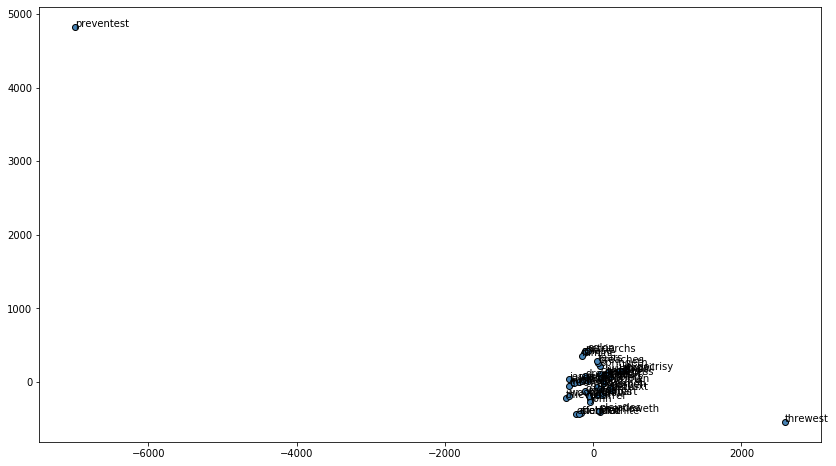

In [27]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
words_ids = [word2id[w] for w in words]
word_vectors = np.array([weights[idx] for idx in words_ids])
print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')
    
# Visualizing Skip-Gram Word2Vec word embeddings using t-SNE

## Leveraging gensim for building a word2vec model

In [16]:
# After building our model, we will use our words of interest to see the top similar
# words for each of them.
from gensim.models import word2vec

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_bible]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30   # Context window size                                                                                    
min_word_count = 1    # Minimum word count                        
sample = 1e-3         # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50)

# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['god', 'jesus', 'noah', 'egypt', 'john', 'gospel', 'moses','famine']}
similar_words

NameError: name 'norm_bible' is not defined

## Visualizing word embeddings

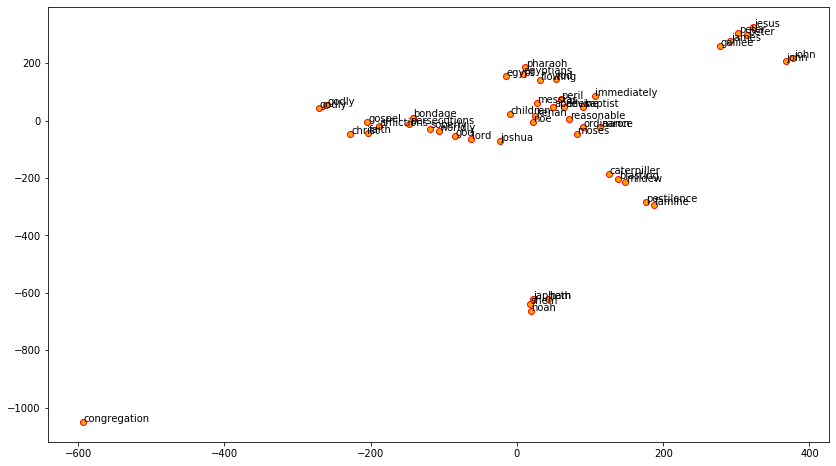

In [31]:
# reduce their dimensions to a 2D space with t-SNE
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

## Applying the word2vec model on our sample corpus

In [17]:
# Remember that our corpus is extremely small, so to get meaningful word
# embeddings and for the model to get more context and semantics, we need more data.
from gensim.models import word2vec

wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_corpus]

# Set values for various parameters
feature_size = 10    # Word vector dimensionality  
window_context = 10  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sample=sample, iter=100)

## Visualize word embeddings

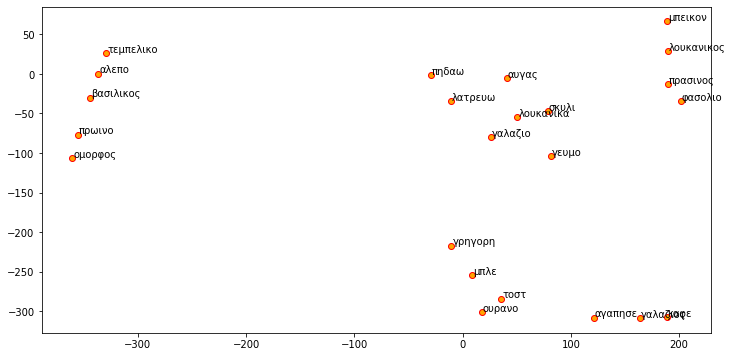

In [18]:
from sklearn.manifold import TSNE

words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')
#   interesting associations

## Sample word embedding

In [19]:
w2v_model.wv['ουρανός']

KeyError: "word 'ουρανός' not in vocabulary"

## Build framework for getting document level embeddings
Suppose we wanted to cluster the eight documents from our toy corpus. We would need to get the document-level embeddings from each of the words present in each document. One strategy would be to average the word embeddings for each word in a document. This is an extremely useful strategy and you can adopt it to your own problems. Let’s apply this on our corpus to get features for each document

In [20]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
   
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [21]:
# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus, model=w2v_model,
                                             num_features=feature_size)
pd.DataFrame(w2v_feature_array)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


,0,1,2,3,4,5,6,7,8,9
0,-0.013532,-0.009756,0.011703,0.013508,-0.026817,-0.020347,-0.027920,-0.010366,0.025953,0.012633
1,0.001408,-0.007500,0.014248,0.017902,-0.022839,-0.011088,-0.012145,-0.018358,0.017627,0.006603
2,0.003435,0.013865,0.018406,0.001918,0.000508,0.003885,-0.008947,-0.012145,-0.005143,-0.005526
3,-0.007747,0.002040,0.004220,0.018214,0.012344,0.004722,-0.017871,0.008655,-0.002891,0.020678
4,-0.013880,0.001923,-0.009619,0.010450,-0.002672,0.004853,-0.015943,0.026171,-0.015698,-0.000215
5,0.000219,0.011486,0.030151,-0.006540,-0.013778,0.010150,-0.005878,-0.013268,0.004202,-0.001004
6,-0.006001,-0.022799,0.010891,0.006253,-0.017116,-0.023749,-0.008997,-0.025556,0.010825,-0.008760
7,-0.003334,0.021804,0.028098,-0.005022,-0.007257,0.010298,-0.009924,-0.006538,0.000133,0.002915


## Clustering with word embeddings
Now that we have our features for each document, let’s cluster these documents using the affinity propagation algorithm, which is a clustering algorithm based on the concept of “message passing” between data points. It does not need the number of clusters as an explicit input, which is often required by partition-based clustering algorithms.


In [22]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(w2v_feature_array)
cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)
# Clusters assigned based on the document features from Word2Vec

,Document,Category,ClusterLabel
0,Ο ουρανός είναι γαλάζιος και όμορφος.,weather,0
1,Αγάπησε αυτόν τον γαλάζιο και όμορφο ουρανό!,weather,0
2,Η γρήγορη καφέ αλεπού πηδάει πάνω από το τεμπέλικο σκυλί.,animals,2
3,"Ένα βασιλικό πρωινό γεύμα έχει λουκάνικα, μπέικον, αυγά, τοστ και φασόλια",food,1
4,"Λατρεύω τα πράσινα αυγά, λουκάνικα, μπέικον και φασόλια!",food,1
5,Η καφέ αλεπού είναι γρήγορη και το μπλε σκυλί είναι τεμπέλικο!,animals,2
6,Ο ουρανός είναι πολύ γαλάζιος και ο ουρανός είναι πολύ όμορφος σήμερα,weather,0
7,Το σκυλί είναι τεμπέλικο αλλά η καφέ αλεπού είναι γρήγορη!,animals,2


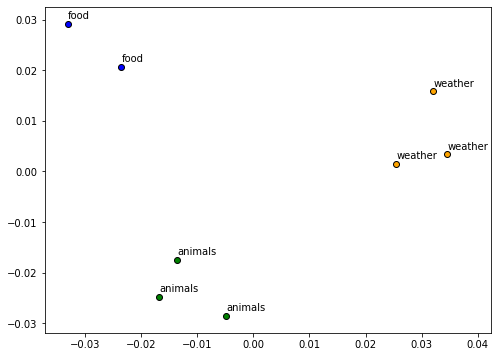

In [23]:
# also visualize how each document is positioned in each cluster by using Principal Component Analysis (PCA) to reduce the
# feature dimensions to 2D and then visualizing them (by color coding each cluster).
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pcs = pca.fit_transform(w2v_feature_array)
labels = ap.labels_
categories = list(corpus_df['Category'])
plt.figure(figsize=(8, 6))

for i in range(len(labels)):
    label = labels[i]
    color = 'orange' if label == 0 else 'blue' if label == 1 else 'green'
    annotation_label = categories[i]
    x, y = pcs[i]
    plt.scatter(x, y, c=color, edgecolors='k')
    plt.annotate(annotation_label, xy=(x+1e-4, y+1e-3), xytext=(0, 0), textcoords='offset points')
# Everything looks to be in order, as documents in each cluster are closer to each other
# and far apart from the other clusters.

## GloVe Embeddings with spaCy (...supports greek language!)


In [ ]:
# import spacy

# nlp = spacy.load('en_vecs')

total_vectors = len(nlp.vocab.vectors)
print('Total word vectors:', total_vectors)

## Visualize GloVe word embeddings

In [39]:
unique_words = list(set([word for sublist in [doc.split() for doc in norm_corpus] for word in sublist]))

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
pd.DataFrame(word_glove_vectors, index=unique_words)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
λατρευω,-0.0488,-0.0186,-0.0312,0.0640,-0.0272,0.0196,0.0614,0.0226,-0.0429,0.0180,...,-0.1160,-0.0328,-0.0310,0.0309,0.0457,0.0019,-0.0058,0.0953,-0.0804,0.1313
τοστ,0.0084,0.0492,-0.2185,0.0572,-0.0734,-0.0694,0.0375,0.0210,-0.1605,-0.0107,...,-0.0151,-0.0127,-0.0007,-0.0003,0.0550,-0.0242,-0.0186,0.0157,-0.0570,0.0225
πηδαω,0.0027,0.0095,-0.0196,-0.0096,-0.0068,0.0041,-0.0164,0.0059,0.0144,-0.0179,...,-0.0046,-0.0076,0.0139,0.0113,0.0123,0.0037,0.0110,0.0010,0.0162,-0.0096
πρασινος,-0.1250,-0.0361,-0.0472,-0.0419,-0.0278,-0.0022,-0.0058,0.0210,-0.0053,-0.0246,...,0.0074,-0.0574,-0.0166,-0.0572,-0.0670,0.0643,-0.0069,0.0445,0.1088,0.0205
μπλε,-0.1563,-0.0027,-0.0628,-0.1963,-0.0434,0.0113,-0.0369,0.0692,0.0184,-0.0760,...,0.0163,-0.0383,-0.0787,-0.0868,-0.0671,0.0565,-0.0741,0.0893,0.2034,0.0650
γαλαζιος,-0.0519,-0.0290,-0.0359,-0.0248,-0.0174,-0.0326,0.0062,-0.0039,-0.0360,-0.0516,...,-0.0320,0.0332,0.0484,-0.0366,0.0107,0.0075,-0.0178,-0.0037,-0.0072,0.0269
ομορφος,-0.0584,0.0155,0.0186,0.0195,0.0333,0.0031,0.0529,0.0645,-0.0161,0.0152,...,0.0010,0.0047,-0.0166,0.0138,-0.0767,-0.0015,0.0439,0.0029,0.0390,0.0210
αγαπησε,-0.0731,0.0205,0.0212,0.0672,0.0102,0.0292,0.0451,-0.0031,-0.0578,0.0050,...,0.0092,0.0467,0.0226,0.0021,0.0329,0.0187,-0.0417,0.1185,0.0057,0.0333
αλεπο,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
αυγας,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


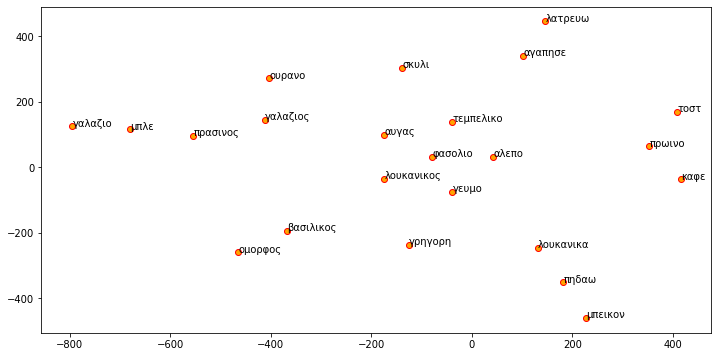

In [40]:
# The beauty of spaCy is that it automatically provides the averaged embeddings
# for words in each document without us having to implement a function like we did in
# Word2Vec. We will now leverage spaCy to get document features for our corpus and use
# k-means clustering to cluster our documents. 
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

## Cluster documents with GloVe Embeddings

In [75]:
from sklearn.cluster import KMeans

doc_glove_vectors = np.array([nlp(str(doc)).vector for doc in norm_corpus])

km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
print (pd.concat([corpus_df, cluster_labels], axis=1))

doc111 = ["γαλαζιο", "αλεπο","λουκανικος", "καφε", "ουρανος", "σκυλι", "μπλε"]
doc111 = np.array([nlp(str(doc)).vector for doc in doc111])
km.fit_transform(doc111)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
print (pd.concat([corpus_df, cluster_labels], axis=1))

# The GloVe model claims to perform better than the Word2Vec model
# in many scenarios

                                                                    Document  \
0                                      Ο ουρανός είναι γαλάζιος και όμορφος.   
1                               Αγάπησε αυτόν τον γαλάζιο και όμορφο ουρανό!   
2                  Η γρήγορη καφέ αλεπού πηδάει πάνω από το τεμπέλικο σκυλί.   
3  Ένα βασιλικό πρωινό γεύμα έχει λουκάνικα, μπέικον, αυγά, τοστ και φασόλια   
4                   Λατρεύω τα πράσινα αυγά, λουκάνικα, μπέικον και φασόλια!   
5             Η καφέ αλεπού είναι γρήγορη και το μπλε σκυλί είναι τεμπέλικο!   
6      Ο ουρανός είναι πολύ γαλάζιος και ο ουρανός είναι πολύ όμορφος σήμερα   
7                 Το σκυλί είναι τεμπέλικο αλλά η καφέ αλεπού είναι γρήγορη!   

  Category  ClusterLabel  
0  weather             0  
1  weather             1  
2  animals             2  
3     food             0  
4     food             0  
5  animals             2  
6  weather             1  
7  animals             2  
                                    

# Leveraging gensim for building a FastText model

In [37]:
# The Gensim package has wrappers that provide interfaces to leverage the FastText model
# available under the gensim.models.fasttext module
from gensim.models.fasttext import FastText

wpt = nltk.WordPunctTokenizer()
# tokenized_corpus = [wpt.tokenize(document) for document in norm_bible]
tokenized_corpus = [wpt.tokenize(document) for document in norm_corpus]
# tokenized_corpus = wpt.tokenize(norm_corpus)

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 50   # Context window size                                                                                    
min_word_count = 5    # Minimum word count                        
sample = 1e-3         # Downsample setting for frequent words


ft_model = FastText(tokenized_corpus, size=feature_size, window=window_context, 
                    min_count=min_word_count,sample=sample, sg=1, iter=50)


RuntimeError: you must first build vocabulary before training the model

In [36]:
# Having these embeddings, we can perform some interesting natural language tasks.
# One of these is to determine the similarity between different words (entities).
# view similar words based on gensim's model
# associations and similarities
similar_words = {search_term: [item[0] for item in ft_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['γαλάζιος', 'αλεπό', 'σκυλί', 'τεμπέλικο', 'ζαμπόν', 'καφέ', 'αυγά','λουκάνικο']}
similar_words

{'γαλάζιος': ['ς', 'ο', 'φ', 'η', 'υ'],
 'αλεπό': ['λ', 'π', 'ε', 'μ', 'τ'],
 'σκυλί': ['ι', 'φ', 'ς', 'κ', 'γ'],
 'τεμπέλικο': ['ε', 'ρ', 'τ', 'ι', 'λ'],
 'ζαμπόν': ['ι', 'γ', 'π', 'τ', 'η'],
 'καφέ': ['ς', 'κ', 'ρ', 'ο', ' '],
 'αυγά': ['ν', 'π', ' ', 'ο', 'υ'],
 'λουκάνικο': ['ς', 'ο', 'κ', ' ', 'μ']}

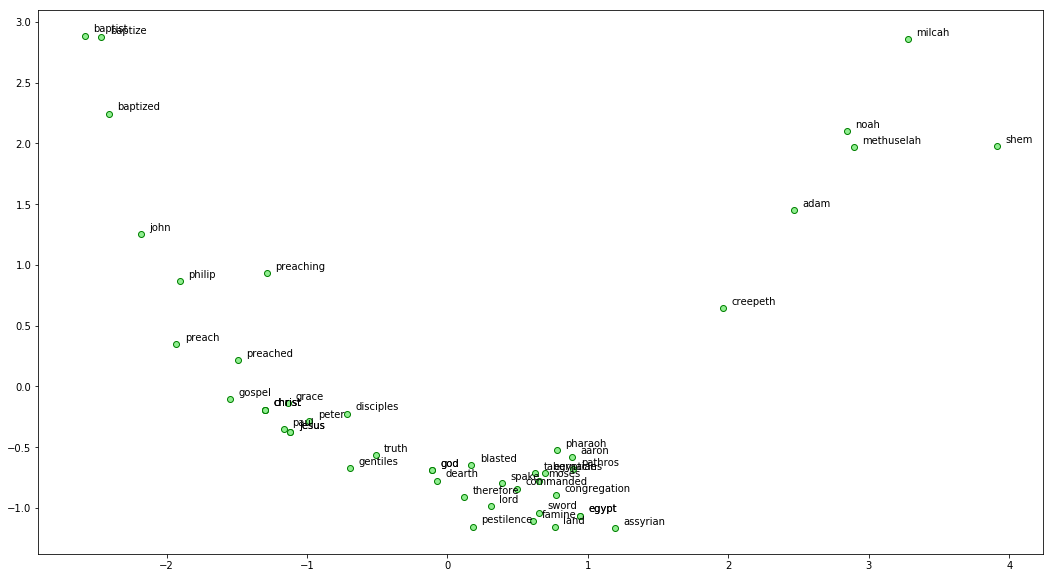

In [63]:
from sklearn.decomposition import PCA

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = ft_model.wv[words]

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
P = pca.fit_transform(wvs)
labels = words

plt.figure(figsize=(18, 10))
plt.scatter(P[:, 0], P[:, 1], c='lightgreen', edgecolors='g')
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')

In [21]:
ft_model.wv['jesus']

array([-0.23493268,  0.14237943,  0.35635167,  0.34680951,  0.09342121,
        0.11546664,  0.06848907, -0.35488272,  0.03399122,  0.26420799,
        0.05554794, -0.41830763, -0.38671952,  0.38901171, -0.26265353,
        0.03854577, -0.22641954,  0.16377565, -0.0347381 , -0.43721643,
       -0.18751772,  0.03163779,  0.12475108,  0.28285024,  0.11760047,
       -0.24720524, -0.25686634, -0.01248573,  0.10454553,  0.29713026,
       -0.04111641, -0.44567475, -0.14127477, -0.20297718,  0.05123538,
       -0.19558378, -0.24215269, -0.22690177,  0.45923024,  0.10298209,
        0.07537983,  0.23333244, -0.34262201,  0.36080933, -0.05114703,
       -0.19241138, -0.46164852, -0.25011861, -0.25578389, -0.11737192,
        0.05247249, -0.00788139, -0.4545919 ,  0.0890988 , -0.58961135,
       -0.15117864,  0.25921214,  0.50884134, -0.03514979, -0.48242396,
       -0.20581312,  0.1193359 ,  0.02668546,  0.22564436, -0.00703725,
        0.34001571, -0.19389269, -0.59574127,  0.13655224, -0.44

In [53]:
print(ft_model.wv.similarity(w1='god', w2='satan'))
print(ft_model.wv.similarity(w1='god', w2='jesus'))

0.333260876685
0.698824900473


In [36]:
st1 = "god jesus satan john"
print('Odd one out for [',st1, ']:', ft_model.wv.doesnt_match(st1.split()))

st2 = "john peter james judas"
print('Odd one out for [',st2, ']:', ft_model.wv.doesnt_match(st2.split()))

Odd one out for [ god jesus satan john ]: satan
Odd one out for [ john peter james judas ]: judas
